"END TO END CLASSIFICATION DATA ANALYSIS"

🔹 Problem Statement

Customer churn refers to customers who stop using a company’s service.
The goal of this project is to analyze customer data and understand the factors that influence customer churn.

🔹 Objective

Identify patterns and trends related to churn

Understand customer behavior using Exploratory Data Analysis (EDA)

Prepare data for building a classification model

🔹 Type of Problem

Machine Learning Type: Supervised Learning

Task: Binary Classification

Target Variable: Churn (Yes / No)

IMPORT THE LIBRARIES

In [70]:
!pip install seaborn


In [87]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [72]:
import seaborn as sns
sns.__version__


'0.13.2'

pandas → data handling and analysis

numpy → numerical operations

matplotlib & seaborn → data visualization

TO READ THE DATASET AND PERFORM EDA ON IT

🔹 Column-wise Description

CustomerID - Unique identifier for each customer.

Gender - Gender of the customer.

SeniorCitizen - Whether the customer is a senior citizen (1 = Yes, 0 = No).

TenureMonths - Number of months the customer has stayed.

MonthlyCharges - Monthly bill amount.

TotalCharges - Total amount paid by the customer.

ContractType - Type of contract (Month-to-month / One year / Two year).

InternetService	- Type of internet service (DSL / Fiber optic / No).

PaymentMethod	- Mode of payment
Churn - Whether the customer left the service (Yes / No).

In [73]:
df = pd.read_csv('customer_churn_dataset.csv')
df.head()

,CustomerID,Gender,SeniorCitizen,TenureMonths,MonthlyCharges,TotalCharges,ContractType,InternetService,PaymentMethod,Churn
0,CUST1,Male,0,63,69.75,1333.69,One year,DSL,Electronic check,No
1,CUST2,Female,0,17,92.02,1953.03,One year,DSL,Credit card,No
2,CUST3,Male,0,33,30.66,7710.44,Month-to-month,DSL,Electronic check,No
3,CUST4,Male,1,29,34.00,2116.92,Two year,DSL,Credit card,No
4,CUST5,Male,0,13,46.37,5326.90,Two year,DSL,Electronic check,No


Loads the CSV file into a DataFrame

head() shows the first 5 rows

Helps understand the structure of data

In [74]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'TenureMonths',
       'MonthlyCharges', 'TotalCharges', 'ContractType', 'InternetService',
       'PaymentMethod', 'Churn'],
      dtype='object')

Displays all column names

Helps in feature identification

In [75]:
df.shape

(500, 10)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    object 
 1   Gender           500 non-null    object 
 2   SeniorCitizen    500 non-null    int64  
 3   TenureMonths     500 non-null    int64  
 4   MonthlyCharges   500 non-null    float64
 5   TotalCharges     500 non-null    float64
 6   ContractType     500 non-null    object 
 7   InternetService  500 non-null    object 
 8   PaymentMethod    500 non-null    object 
 9   Churn            500 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


Displays all column names

Helps in feature identification

Target variable analysis

In [77]:
df['Churn'].value_counts()

Churn
No     367
Yes    133
Name: count, dtype: int64

Shows number of customers who churned vs not churned

Helps to understand class distribution

<Axes: xlabel='Churn', ylabel='count'>

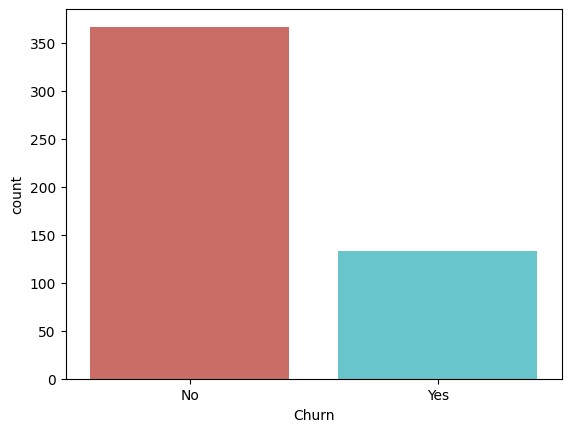

In [78]:
sns.countplot(x=df['Churn'],palette='hls')

Visual representation of churn vs non-churn customers

Makes class imbalance easy to understand

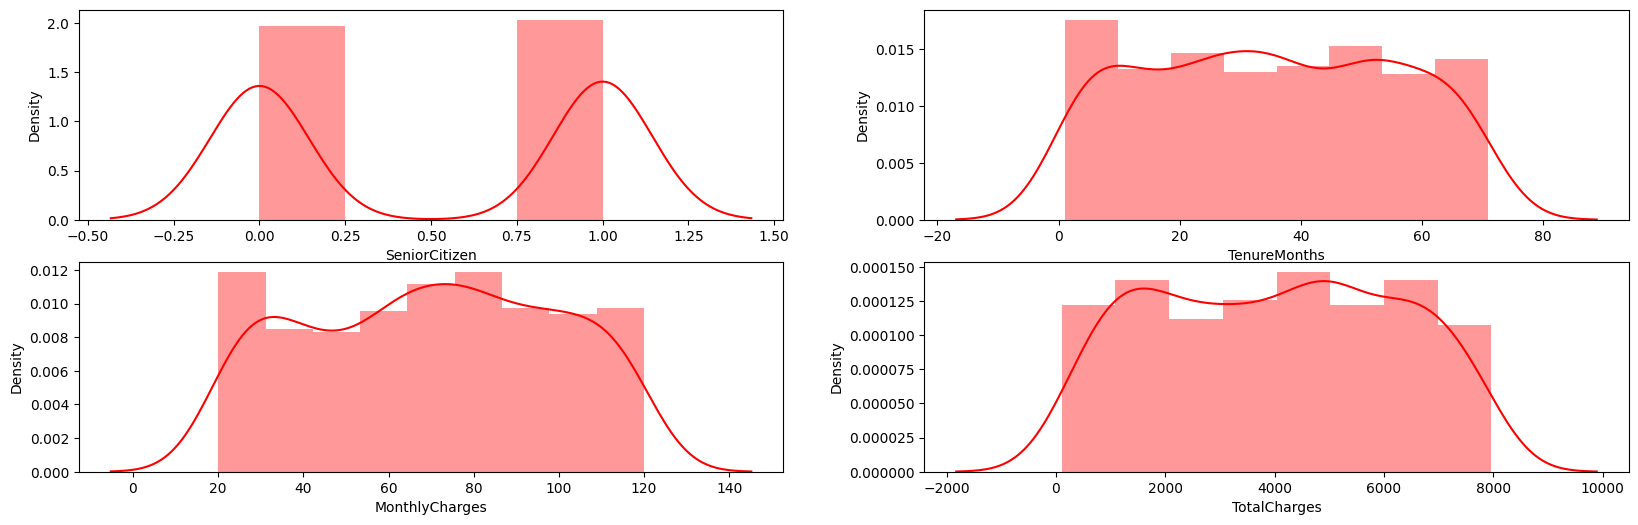

In [79]:
Num_Fea = df.select_dtypes(exclude = 'object')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,6))
k = 0
for i in range(2):
    for j in range(2): 
            sns.distplot( Num_Fea.iloc[:,k],ax= axes[i][j], color = 'red')
            k += 1
plt.show()

TO CHECH NULL VAUES

In [80]:
df.isnull().sum()   

CustomerID         0
Gender             0
SeniorCitizen      0
TenureMonths       0
MonthlyCharges     0
TotalCharges       0
ContractType       0
InternetService    0
PaymentMethod      0
Churn              0
dtype: int64

No Null Values

TO LOOK AT THE DUPLICATES

In [81]:
df.duplicated().sum()

0

No Duplicate Values

TO SEPERATE THE INDEPENDENT AND DEPENDENT VALUES

In [82]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


One-Hot Encoding

In [83]:
df = pd.get_dummies(
    df,
    columns=['Gender','ContractType','InternetService','PaymentMethod'],
    drop_first=True
)


In [84]:
#independent features
X = df.drop(['CustomerID','Churn'], axis=1)
y = df['Churn']
X.head()

,SeniorCitizen,TenureMonths,MonthlyCharges,TotalCharges,Gender_Male,ContractType_One year,ContractType_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,63,69.75,1333.69,True,True,False,False,False,False,True,False
1,0,17,92.02,1953.03,False,True,False,False,False,True,False,False
2,0,33,30.66,7710.44,True,False,False,False,False,False,True,False
3,1,29,34.00,2116.92,True,False,True,False,False,True,False,False
4,0,13,46.37,5326.90,True,False,True,False,False,False,True,False


In [85]:
FEATURES = [
    'SeniorCitizen',
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges',
    'Gender_Male',
    'ContractType_One year',
    'ContractType_Two year',
    'InternetService_Fiber optic',
    'InternetService_No',
    'PaymentMethod_Electronic check'
]

X = X[FEATURES]


Train–Test Split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Separate Numerical & Categorical Columns

In [90]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['SeniorCitizen','TenureMonths','MonthlyCharges','TotalCharges']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Separates numerical and categorical features

Different preprocessing is needed for each type

Univariate Analysis (Numerical Features)

In [91]:
df[num_cols].describe()

,SeniorCitizen,TenureMonths,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000
mean,0.508000,34.970000,69.986380,3997.962900
std,0.500437,20.665605,29.139545,2224.916566
min,0.000000,1.000000,20.020000,102.630000
25%,0.000000,17.000000,44.990000,2024.537500
50%,1.000000,34.500000,71.565000,4082.225000
75%,1.000000,52.250000,94.362500,5966.675000
max,1.000000,71.000000,119.940000,7964.300000


Gives statistical summary:

Mean

Median

Min, Max

Standard deviation

Helps detect outliers and skewness

                       Histograms

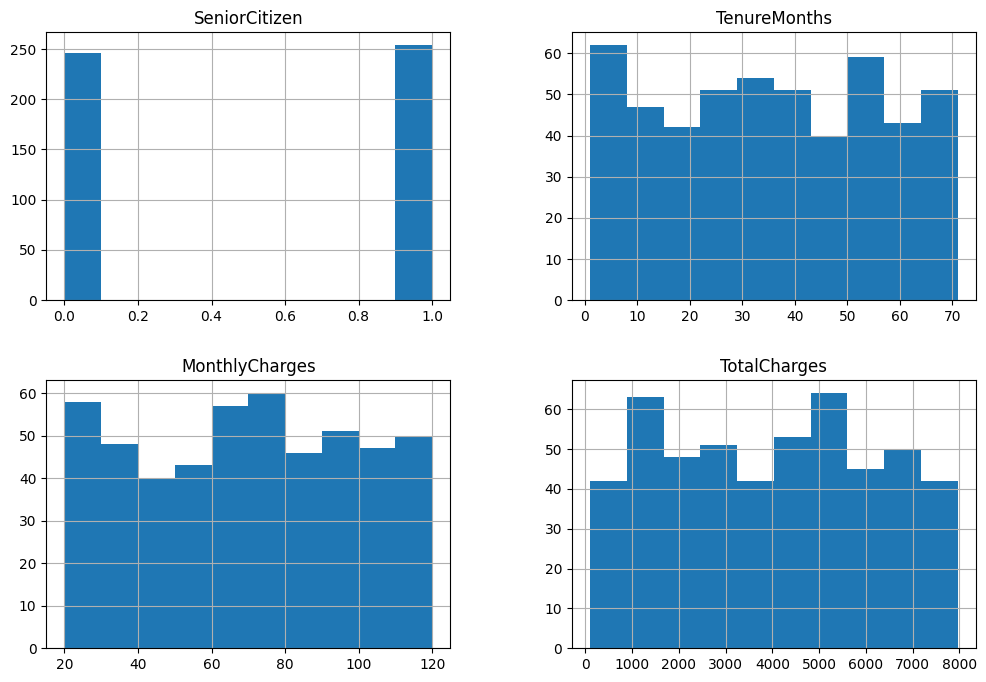

In [ ]:
df[num_cols].hist(figsize=(12,8))
plt.show()

Shows distribution of numerical features

Helps understand data spread

Univariate Analysis (Categorical Features)

In [ ]:
for col in cat_cols:
    print(df[col].value_counts())


CustomerID
CUST1      1
CUST330    1
CUST343    1
CUST342    1
CUST341    1
          ..
CUST162    1
CUST161    1
CUST160    1
CUST159    1
CUST500    1
Name: count, Length: 500, dtype: int64


Bivariate Analysis (Feature vs Target)

Tenure vs Churn

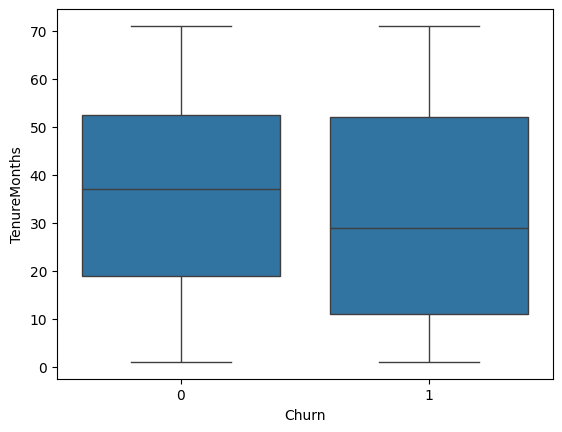

In [ ]:
sns.boxplot(x="Churn", y="TenureMonths", data=df)
plt.show()


Compares tenure of churned vs non-churned customers

Shows churn is higher for low-tenure customers

MonthlyCharges vs Churn


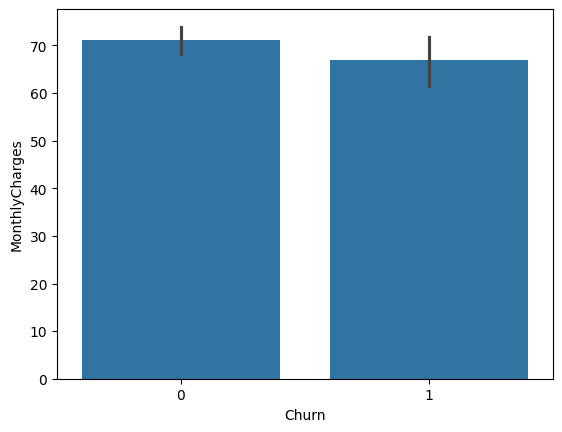

In [ ]:
sns.barplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()


Analyzes impact of monthly charges on churn

Contract Type vs Churn

In [96]:
sns.countplot(x="ContractType", hue="Churn", data=df)
plt.show()


ValueError: Could not interpret value `ContractType` for `x`. An entry with this name does not appear in `data`.

Shows churn rate across contract types

Month-to-month contracts usually have higher churn

Multivariate Analysis (Correlation)

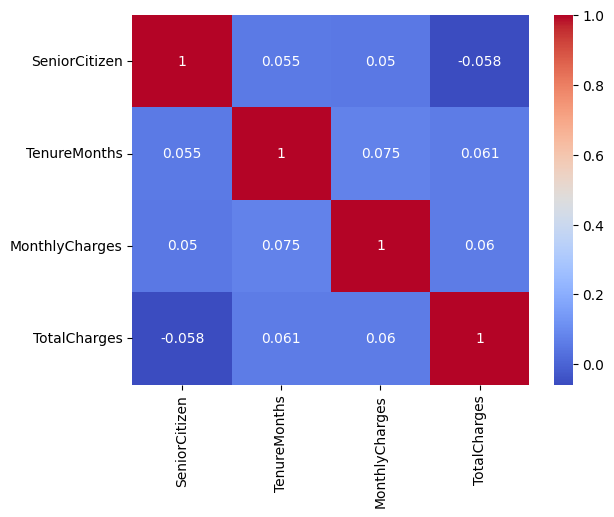

In [95]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


Shows relationship between numerical variables

Helps detect multicollinearity

Train Classification Model

Logistic Regression

In [97]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluate Model

In [98]:
from sklearn.metrics import accuracy_score
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc


73

SVM

In [99]:
#svm
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [100]:
#accuracy
SVM_acc=round(model_SVM.score(X_test, y_test)*100)
SVM_acc

73

DECISION TREE

In [114]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [115]:
DT_acc=round(model_DT.score(X_test, y_test)*100)
DT_acc

57

RANDOM FOREST

In [102]:
#apply random forest model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [103]:
RF_acc=round(model_RF.score(X_test, y_test)*100)
RF_acc

73

K-NEAREST NEIGHBORS

In [104]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [105]:
KNN_acc=round(model_KNN.score(X_test, y_test)*100)
KNN_acc

65

GRADIENT BOOSTING CLASSIFIER

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)



,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [109]:
GB_acc=round(model_GB.score(X_test, y_test)*100)
GB_acc

69

Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [111]:
NB_acc=round(model_NB.score(X_test, y_test)*100)
NB_acc

73

MODEL COMPARISON TABLE

In [116]:
Accuracy = [LogReg_acc, DT_acc, RF_acc, SVM_acc, GB_acc, NB_acc, KNN_acc]
models = [
    "LogisticRegression",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "SVM",
    "GradientBoostingClassifier",
    "NaiveBayes",
    "KNeighborsClassifier",

]



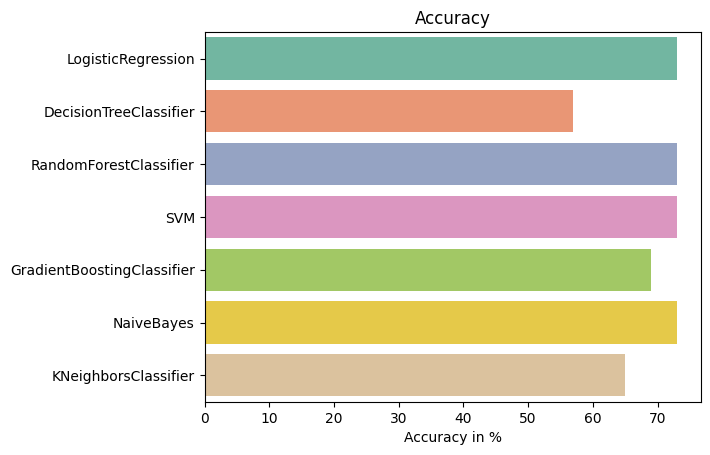

In [117]:
sns.barplot(x=Accuracy, y=models, palette="Set2")
plt.xlabel('Accuracy in %')
plt.title('Accuracy')
plt.show()

TO ARRANGE THE PLOT IN ASCENDING ORDER

In [118]:
accuracy = [73,66,73,73,71,70,57]
models = [
    "LogisticRegression",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "SVM",
    "GradientBoostingClassifier",
    "NaiveBayes",
    "KNeighborsClassifier",

]

In [119]:
import pandas as pd
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy
})

df_sorted = df.sort_values(by='Accuracy', ascending=True)

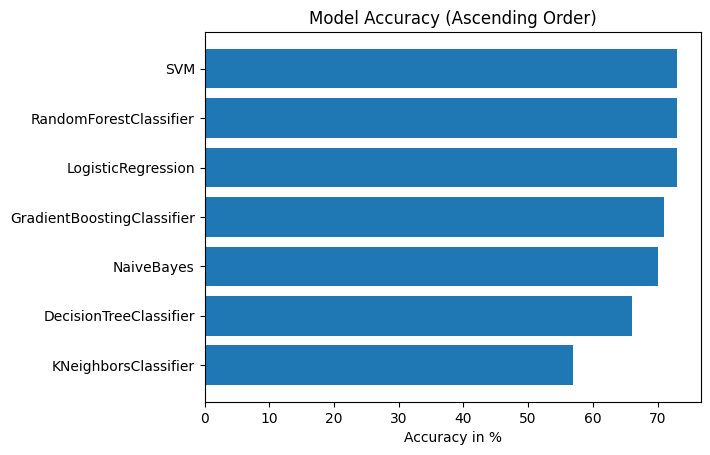

In [120]:
import matplotlib.pyplot as plt
plt.barh(df_sorted['Model'], df_sorted['Accuracy'])
plt.xlabel('Accuracy in %')
plt.title('Model Accuracy (Ascending Order)')
plt.show()

TO GET CONFUSION MATRXI

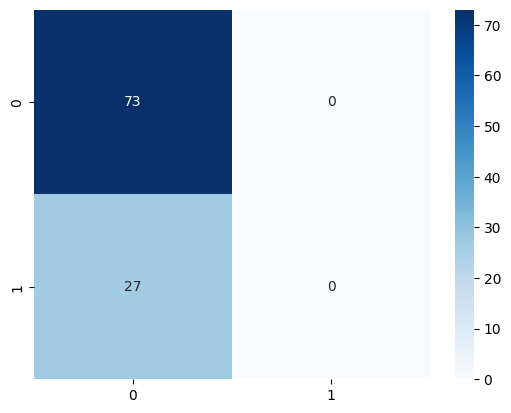

In [121]:
# get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_LogReg.predict(X_test))
sns.heatmap(confusion_matrix(y_test,model_LogReg.predict(X_test)),cmap="Blues",annot=True)
plt.show()


In [122]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, model_LogReg.predict(X_train))
cm

array([[294,   0],
       [105,   1]], dtype=int64)

In [123]:
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [128]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        73
           1       0.00      0.00      0.00        27

    accuracy                           0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100



PREDICT OUTPUT

In [132]:
new_customer = {
    'SeniorCitizen': 1,
    'TenureMonths': 1,
    'MonthlyCharges': 120,
    'TotalCharges': 120,
    'Gender_Male': 1,
    'ContractType_One year': 0,
    'ContractType_Two year': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'PaymentMethod_Electronic check': 1
}

new_df = pd.DataFrame([new_customer])

# column alignment
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# scale numeric columns
new_df[num_cols] = scaler.transform(new_df[num_cols])

final_model.predict(new_df)



array([0], dtype=int64)

TO SAVE THE MODEL AND THE SCALER

In [130]:
import pickle

pickle.dump(final_model, open("finalized_LogReg.sav", "wb"))
pickle.dump(scaler, open("scaler_model.sav", "wb"))


Load Saved Model

In [133]:
loaded_model = pickle.load(open("finalized_LogReg.sav", "rb"))
loaded_scaler = pickle.load(open("scaler_model.sav", "rb"))

loaded_model.predict(new_df)


array([0], dtype=int64)